In [1]:
# CARGAMOS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import math

In [2]:
# CARGAMOS LOS RETORNOS DE TODOS LOS ACTIVOS QUE HAN PERTENECIDO AL IBEX35 Y EL BENCHMARK
returns = pd.read_csv('ibex_historical_returns.csv',index_col='date')
returns.index = pd.to_datetime(returns.index)
returns.head()

A3TV  ABE  ABG.P_1  ABG  ACS     ACX_1  ACX_2  AENA  AGS  \
date                                                                   
1993-08-17   NaN  NaN      NaN  NaN  NaN  0.000831    NaN   NaN  NaN   
1993-08-18   NaN  NaN      NaN  NaN  NaN -0.002079    NaN   NaN  NaN   
1993-08-19   NaN  NaN      NaN  NaN  NaN -0.004088    NaN   NaN  NaN   
1993-08-20   NaN  NaN      NaN  NaN  NaN -0.007048    NaN   NaN  NaN   
1993-08-23   NaN  NaN      NaN  NaN  NaN -0.002867    NaN   NaN  NaN   

               ALB_2  ...  TL5  TRE  TUB  UNF       VIS  VIS_1  VIS_2  VIS_3  \
date                  ...                                                      
1993-08-17  0.023395  ...  NaN  NaN  NaN  NaN  0.025183    NaN    NaN    NaN   
1993-08-18  0.003814  ...  NaN  NaN  NaN  NaN  0.027093    NaN    NaN    NaN   
1993-08-19 -0.009661  ...  NaN  NaN  NaN  NaN -0.021590    NaN    NaN    NaN   
1993-08-20 -0.005882  ...  NaN  NaN  NaN  NaN -0.005504    NaN    NaN    NaN   
1993-08-23 -0.027700  ...  NaN  NaN  NaN  NaN  0.000000    NaN    NaN    NaN   

            ZEL  benchmark  
date                        
1993-08-17  NaN   0.016909  
1993-08-18  NaN   0.012458  
1993-08-19  NaN   0.007611  
1993-08-20  NaN  -0.000402  
1993-08-23  NaN  -0.003132  

[5 rows x 98 columns]

In [3]:
# CARGAMOS LOS DATOS DE PRECIOS DE CIERRE AJUSTADO PARA TODOS LOS ACTIVOS QUE HAN PERTENECIDO AL IBEX35 Y EL BENCHMARK
prices = pd.read_csv('ibex_historical_data.csv', index_col='date')
prices.index = pd.to_datetime(prices.index)
prices.head()

A3TV  ABE  ABG.P_1  ABG  ACS   ACX_1  ACX_2  AENA  AGS   ALB_2  \
date                                                                         
1993-08-16   NaN  NaN      NaN  NaN  NaN  1.2025    NaN   NaN  NaN  3.4515   
1993-08-17   NaN  NaN      NaN  NaN  NaN  1.2035    NaN   NaN  NaN  3.5332   
1993-08-18   NaN  NaN      NaN  NaN  NaN  1.2010    NaN   NaN  NaN  3.5467   
1993-08-19   NaN  NaN      NaN  NaN  NaN  1.1961    NaN   NaN  NaN  3.5126   
1993-08-20   NaN  NaN      NaN  NaN  NaN  1.1877    NaN   NaN  NaN  3.4920   

            ...  TL5  TRE  TUB  UNF     VIS  VIS_1  VIS_2  VIS_3  ZEL  \
date        ...                                                         
1993-08-16  ...  NaN  NaN  NaN  NaN  2.9683    NaN    NaN    NaN  NaN   
1993-08-17  ...  NaN  NaN  NaN  NaN  3.0440    NaN    NaN    NaN  NaN   
1993-08-18  ...  NaN  NaN  NaN  NaN  3.1276    NaN    NaN    NaN  NaN   
1993-08-19  ...  NaN  NaN  NaN  NaN  3.0608    NaN    NaN    NaN  NaN   
1993-08-20  ...  NaN  NaN  NaN  NaN  3.0440    NaN    NaN    NaN  NaN   

              benchmark  
date                     
1993-08-16  3113.896729  
1993-08-17  3166.996826  
1993-08-18  3206.696777  
1993-08-19  3231.196777  
1993-08-20  3229.896729  

[5 rows x 98 columns]

In [4]:
# CARGAMOS LOS DATOS DE LA TASA DE RETORNO DE LOS BONOS A 3 MESES DE LOS EEUU
t_bill_files = [filename for filename in os.listdir('./Datos TFM') if filename.startswith("United States 3-Month Bond Yield")]
t_bill_data = pd.DataFrame()
for f in t_bill_files:
    file_path = './Datos TFM/'+f
    file = pd.read_csv(file_path)
    t_bill_data = pd.concat([t_bill_data,file],axis=0)
t_bill_data.index = pd.to_datetime(t_bill_data.Date)
t_bill_data.drop('Date',axis=1,inplace=True)
t_bill_data.head()

Price   Open   High    Low Change %
Date                                           
2023-07-25  5.436  5.432  5.439  5.426    0.34%
2023-07-24  5.418  5.453  5.486  5.418   -0.11%
2023-07-21  5.424  5.445  5.469  5.411    0.15%
2023-07-20  5.416  5.448  5.503  5.409    0.07%
2023-07-19  5.412  5.452  5.452  5.409    0.00%

In [13]:
def locate_in_df(df, value):
    a = df.to_numpy()
    row = np.where(a == value)[0][0]
    col = np.where(a == value)[1][0]
    return row, col
locate_in_df(returns,returns.min().min()), returns.min().min()

((6364, 32), -0.5485728680717057)

In [12]:
# prices.iloc[5136:,36] = np.nan
# returns.iloc[5135:,36] = np.nan
# prices.iloc[5626:, 2] = np.nan
# returns.iloc[5625:, 2] = np.nan

In [1330]:
# DEFINIMOS UNA CANTIDAD DE DIAS PARA LA VENTANA DE CALCULO DE LOS RETORNOS
DIAS = 30
LENGTH = 5
# DEFINIMOS LA CANTIDAD MAXIMA DE ACTIVOS QUE HABRAN EN NUESTRO RANKING
ACTIVOS = 10

Debemos completar los retornos de manera que nos permita no tener un dataset con muchos valores nulos y así poder analizarlo correctamente. Hay varias opciones 
a la hora de completar los datos nulos:
1) Completar el dataset de retornos con un retorno constante en los días en los que no haya cotizado dicho activo. Dentro de esta solución hay varias opciones:
    - Completar con ceros
    - Completar con -1
    - Completar el dataset con el peor retorno diario de todo el dataset y multiplicarlo por una constante para evitar que se cruce con el activo de peor retorno
2) Completar el dataset hacia adelante con el último retorno que haya tenido y hacia atrás con el primer retorno que haya tenido
3) Completar el dataset con el peor retorno de cada día y multiplicarlo por una constante para evitar que se cruce con el activo de peor retorno

Probemos opciones:

#### COMPLETAR CON RETORNOS A CERO

In [1331]:
returns_completed_zero = returns.apply(lambda x: x.fillna(0), axis=1)
returns_completed_zero.head()

A3TV  ABE  ABG.P_1  ABG  ACS     ACX_1  ACX_2  AENA  AGS  \
date                                                                   
1993-08-17   0.0  0.0      0.0  0.0  0.0  0.000831    0.0   0.0  0.0   
1993-08-18   0.0  0.0      0.0  0.0  0.0 -0.002079    0.0   0.0  0.0   
1993-08-19   0.0  0.0      0.0  0.0  0.0 -0.004088    0.0   0.0  0.0   
1993-08-20   0.0  0.0      0.0  0.0  0.0 -0.007048    0.0   0.0  0.0   
1993-08-23   0.0  0.0      0.0  0.0  0.0 -0.002867    0.0   0.0  0.0   

               ALB_2  ...  TRE  TUB  UNF       VIS  VIS_1  VIS_2  VIS_3  ZEL  \
date                  ...                                                      
1993-08-17  0.023395  ...  0.0  0.0  0.0  0.025183    0.0    0.0    0.0  0.0   
1993-08-18  0.003814  ...  0.0  0.0  0.0  0.027093    0.0    0.0    0.0  0.0   
1993-08-19 -0.009661  ...  0.0  0.0  0.0 -0.021590    0.0    0.0    0.0  0.0   
1993-08-20 -0.005882  ...  0.0  0.0  0.0 -0.005504    0.0    0.0    0.0  0.0   
1993-08-23 -0.027700  ...  0.0  0.0  0.0  0.000000    0.0    0.0    0.0  0.0   

            benchmark  risk_free_rate  
date                                   
1993-08-17   0.016909         0.03076  
1993-08-18   0.012458         0.03044  
1993-08-19   0.007611         0.03034  
1993-08-20  -0.000402         0.03043  
1993-08-23  -0.003132         0.03059  

[5 rows x 99 columns]

El problema de esta solución es que así como tenemos retornos mayores a cero también tenemos retornos menores a cero. Como nuestra tarea será predecir un ranking
aquellos activos que tengan retorno cero podrían quedar con una mejor posicion dentro del ranking que aquellos que tengan un retorno menor. Por lo tanto debemos descartar esta opción

#### COMPLETAR CON RETORNOS A -1

In [1332]:
returns.apply(lambda x: x.fillna(-1), axis=1).min().min()

-1.0

In [1333]:
# DEFINIMOS NUESTRA TASA LIBRE DE RIESGO A TRAVÉS DE LOS VALORES DE LA TASA T-BILLS DE 3 MESES
risk_free_rate = t_bill_data['Price']/100
risk_free_rate = risk_free_rate.sort_index()
returns_completed_zero['risk_free_rate'] = risk_free_rate.loc[returns.index[0]:]
returns_completed_zero['risk_free_rate'] = returns_completed_zero['risk_free_rate'].fillna(method='ffill')
adjusted_returns = (returns_completed_zero.iloc[:,:-2].T - returns_completed_zero['risk_free_rate']).T
adjusted_period_returns_mean = adjusted_returns.rolling(DIAS, min_periods=DIAS).mean()
adjusted_period_returns_std = adjusted_returns.rolling(DIAS, min_periods=DIAS).std()

(adjusted_period_returns_mean / adjusted_period_returns_std).dropna()

A3TV         ABE     ABG.P_1         ABG        ACS  \
date                                                                    
1993-09-27  -91.848047  -91.848047  -91.848047  -91.848047 -91.848047   
1993-09-28  -87.438395  -87.438395  -87.438395  -87.438395 -87.438395   
1993-09-29  -85.856272  -85.856272  -85.856272  -85.856272 -85.856272   
1993-09-30  -84.143634  -84.143634  -84.143634  -84.143634 -84.143634   
1993-10-01  -83.087387  -83.087387  -83.087387  -83.087387 -83.087387   
...                ...         ...         ...         ...        ...   
2023-08-07 -142.590431 -142.590431 -142.590431 -142.590431  -3.647721   
2023-08-08 -147.388431 -147.388431 -147.388431 -147.388431  -3.693329   
2023-08-09 -157.141613 -157.141613 -157.141613 -157.141613  -3.680518   
2023-08-10 -164.482418 -164.482418 -164.482418 -164.482418  -3.712974   
2023-08-11 -188.238599 -188.238599 -188.238599 -188.238599  -3.821176   

                 ACX_1      ACX_2       AENA         AGS       ALB_2  ...  \
date                                                                  ...   
1993-09-27   -2.688085 -91.848047 -91.848047  -91.848047   -1.788145  ...   
1993-09-28   -2.374874 -87.438395 -87.438395  -87.438395   -1.790468  ...   
1993-09-29   -2.081862 -85.856272 -85.856272  -85.856272   -1.806939  ...   
1993-09-30   -2.035571 -84.143634 -84.143634  -84.143634   -1.771559  ...   
1993-10-01   -1.956327 -83.087387 -83.087387  -83.087387   -1.773438  ...   
...                ...        ...        ...         ...         ...  ...   
2023-08-07 -142.590431  -3.912881  -5.090884 -142.590431 -142.590431  ...   
2023-08-08 -147.388431  -3.914392  -5.280459 -147.388431 -147.388431  ...   
2023-08-09 -157.141613  -3.816535  -5.369799 -157.141613 -157.141613  ...   
2023-08-10 -164.482418  -3.800612  -5.295422 -164.482418 -164.482418  ...   
2023-08-11 -188.238599  -3.804463  -5.163985 -188.238599 -188.238599  ...   

                   TEM         TL5         TRE         TUB         UNF  \
date                                                                     
1993-09-27  -91.848047  -91.848047  -91.848047  -91.848047  -91.848047   
1993-09-28  -87.438395  -87.438395  -87.438395  -87.438395  -87.438395   
1993-09-29  -85.856272  -85.856272  -85.856272  -85.856272  -85.856272   
1993-09-30  -84.143634  -84.143634  -84.143634  -84.143634  -84.143634   
1993-10-01  -83.087387  -83.087387  -83.087387  -83.087387  -83.087387   
...                ...         ...         ...         ...         ...   
2023-08-07 -142.590431 -142.590431 -142.590431 -142.590431 -142.590431   
2023-08-08 -147.388431 -147.388431 -147.388431 -147.388431 -147.388431   
2023-08-09 -157.141613 -157.141613 -157.141613 -157.141613 -157.141613   
2023-08-10 -164.482418 -164.482418 -164.482418 -164.482418 -164.482418   
2023-08-11 -188.238599 -188.238599 -188.238599 -188.238599 -188.238599   

                   VIS       VIS_1       VIS_2       VIS_3         ZEL  
date                                                                    
1993-09-27   -1.923393  -91.848047  -91.848047  -91.848047  -91.848047  
1993-09-28   -2.065537  -87.438395  -87.438395  -87.438395  -87.438395  
1993-09-29   -2.251365  -85.856272  -85.856272  -85.856272  -85.856272  
1993-09-30   -2.159276  -84.143634  -84.143634  -84.143634  -84.143634  
1993-10-01   -2.126563  -83.087387  -83.087387  -83.087387  -83.087387  
...                ...         ...         ...         ...         ...  
2023-08-07 -142.590431 -142.590431 -142.590431 -142.590431 -142.590431  
2023-08-08 -147.388431 -147.388431 -147.388431 -147.388431 -147.388431  
2023-08-09 -157.141613 -157.141613 -157.141613 -157.141613 -157.141613  
2023-08-10 -164.482418 -164.482418 -164.482418 -164.482418 -164.482418  
2023-08-11 -188.238599 -188.238599 -188.238599 -188.238599 -188.238599  

[7571 rows x 97 columns]

In [1334]:
# COMPLETAMOS LOS RETORNOS DE TODOS LOS ACTIVOS
# returns_cleaned = returns.apply(lambda x: x.fillna(abs(x.min())*-2), axis=1)
returns_cleaned = returns
# returns_cleaned = returns.apply(lambda x: x.fillna(0), axis=1)
# DEFINIMOS NUESTRA TASA LIBRE DE RIESGO A TRAVÉS DE LOS VALORES DE LA TASA T-BILLS DE 3 MESES
risk_free_rate = t_bill_data['Price']/100
risk_free_rate = risk_free_rate.sort_index()
returns_cleaned['risk_free_rate'] = risk_free_rate.loc[returns.index[0]:]
returns_cleaned['risk_free_rate'] = returns_cleaned['risk_free_rate'].fillna(method='ffill')
# AGREGAMOS LA OPCIÓN DE NO INVERTIR EN NINGUN ACTIVO COMO UNA COLUMNA CON RETORNO CERO
# returns['cash'] = 0

In [1335]:
# CALCULAMOS LA SUMA DE RETORNOS CON ESA VENTANA DE DIAS DEFINIDA
adjusted_returns = (returns_cleaned.iloc[:,:-2].T - returns_cleaned['risk_free_rate']).T
adjusted_period_returns_mean = adjusted_returns.rolling(LENGTH, min_periods=LENGTH).mean()
adjusted_period_returns_std = adjusted_returns.rolling(LENGTH, min_periods=LENGTH).std()
downside_dev  = np.minimum(0, adjusted_returns)**2
downside_dev = np.sqrt(downside_dev.rolling(LENGTH,min_periods=LENGTH).mean())
benchmark_std = returns['benchmark'].rolling(LENGTH,min_periods=LENGTH).std()

market_stock_cov = returns_cleaned.iloc[:,:-2].rolling(LENGTH, min_periods=LENGTH).cov(returns_cleaned.iloc[:,-2])
market_variance = returns_cleaned.iloc[:,-2].rolling(LENGTH, min_periods=LENGTH).var()
beta = (market_stock_cov.T/market_variance).T
treynor_ratio = adjusted_period_returns_mean / beta

benchmark_adjusted_returns = (returns_cleaned.iloc[:,:-2].T - returns_cleaned['benchmark']).T
benchmark_adjusted_returns_mean = benchmark_adjusted_returns.rolling(LENGTH, min_periods=LENGTH).mean()
benchmark_adjusted_returns_std = benchmark_adjusted_returns.rolling(LENGTH, min_periods=LENGTH).std()

sharpe_ratio = adjusted_period_returns_mean / adjusted_period_returns_std
sortino_ratio =  adjusted_period_returns_mean / downside_dev
modigliani_measure = ((sharpe_ratio.T * benchmark_std) + returns_cleaned['risk_free_rate']).T
information_ratio = benchmark_adjusted_returns_mean / benchmark_adjusted_returns_std
# alfa_jensen = returns_cleaned.iloc[:,:-2].T - (returns_cleaned['risk_free_rate'] - beta * (returns_cleaned['benchmark'] - returns_cleaned['risk_free_rate']))

In [1336]:
rolling_max = prices.iloc[1:,:-1].expanding(min_periods=LENGTH).max()
daily_drawdown = (prices.iloc[1:,:-1]/rolling_max) - 1.0
max_drawdown = daily_drawdown.rolling(LENGTH, min_periods=LENGTH).min()
calmar_ratio = adjusted_period_returns_mean / max_drawdown

In [1337]:
in_index_mask = returns_cleaned.iloc[:,:-2].isnull() * 1

In [1338]:
in_index_mask.shape, returns_cleaned.shape

((7600, 97), (7600, 99))

In [1339]:
# returns_cleaned.iloc[:,:-2].T - (returns_cleaned['risk_free_rate'] - beta * (returns_cleaned['benchmark'] - returns_cleaned['risk_free_rate']))

In [1340]:
ranking_sharpe = sharpe_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_sortino = sortino_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_modigliani = modigliani_measure[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_treynor = treynor_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_information = information_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_calmar = calmar_ratio[DIAS:].dropna(how='all').rank(axis=1, numeric_only=True, method='max',ascending=False)

In [1342]:
ranking_concat = pd.concat([ranking_sharpe, ranking_sortino, ranking_modigliani, ranking_treynor, ranking_information, ranking_calmar])
ranking_concat = ranking_concat.groupby(ranking_concat.index).mean()
# ranking_concat = np.argsort(np.argsort(ranking_concat))
ranking_concat = pd.DataFrame(ranking_concat, index=ranking_calmar.index, columns=ranking_sortino.columns)
ranking_concat

A3TV  ABE  ABG.P_1  ABG        ACS     ACX_1      ACX_2  \
date                                                                  
1993-09-28   NaN  NaN      NaN  NaN        NaN  5.166667        NaN   
1993-09-29   NaN  NaN      NaN  NaN        NaN  3.166667        NaN   
1993-09-30   NaN  NaN      NaN  NaN        NaN  3.166667        NaN   
1993-10-01   NaN  NaN      NaN  NaN        NaN  3.333333        NaN   
1993-10-04   NaN  NaN      NaN  NaN        NaN  3.333333        NaN   
...          ...  ...      ...  ...        ...       ...        ...   
2023-08-07   NaN  NaN      NaN  NaN  23.500000       NaN  23.333333   
2023-08-08   NaN  NaN      NaN  NaN  21.833333       NaN  23.500000   
2023-08-09   NaN  NaN      NaN  NaN  20.333333       NaN  18.000000   
2023-08-10   NaN  NaN      NaN  NaN  25.333333       NaN  22.166667   
2023-08-11   NaN  NaN      NaN  NaN  24.333333       NaN  16.833333   

                 AENA  AGS     ALB_2  ...  TEM  TL5  TRE  TUB  UNF       VIS  \
date                                  ...                                      
1993-09-28        NaN  NaN  5.166667  ...  NaN  NaN  NaN  NaN  NaN  6.833333   
1993-09-29        NaN  NaN  6.166667  ...  NaN  NaN  NaN  NaN  NaN  9.166667   
1993-09-30        NaN  NaN  4.666667  ...  NaN  NaN  NaN  NaN  NaN  7.000000   
1993-10-01        NaN  NaN  5.000000  ...  NaN  NaN  NaN  NaN  NaN  5.666667   
1993-10-04        NaN  NaN  5.333333  ...  NaN  NaN  NaN  NaN  NaN  5.500000   
...               ...  ...       ...  ...  ...  ...  ...  ...  ...       ...   
2023-08-07  21.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-08  22.000000  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-09  20.166667  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-10  21.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-11  17.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   

            VIS_1  VIS_2  VIS_3  ZEL  
date                                  
1993-09-28    NaN    NaN    NaN  NaN  
1993-09-29    NaN    NaN    NaN  NaN  
1993-09-30    NaN    NaN    NaN  NaN  
1993-10-01    NaN    NaN    NaN  NaN  
1993-10-04    NaN    NaN    NaN  NaN  
...           ...    ...    ...  ...  
2023-08-07    NaN    NaN    NaN  NaN  
2023-08-08    NaN    NaN    NaN  NaN  
2023-08-09    NaN    NaN    NaN  NaN  
2023-08-10    NaN    NaN    NaN  NaN  
2023-08-11    NaN    NaN    NaN  NaN  

[7570 rows x 97 columns]

In [1017]:
# ranking = sharpe_ratio.loc[sharpe_ratio.index[DIAS:]].rank(axis=1, numeric_only=True, method='max',ascending=False)
# ranking = (sharpe_ratio.loc[sharpe_ratio.index[10:-4]] - sharpe_ratio.loc[sharpe_ratio.index[10:-4]].mean())/sharpe_ratio.loc[sharpe_ratio.index[10:-4]].std()
# ranking = sharpe_ratio.loc[sharpe_ratio.index[DIAS:]]#.fillna(sharpe_ratio.min().min())
# ranking = ((ranking - ranking.mean()) / ranking.std())
# ranking = ((ranking_concat - ranking_concat.min())/(ranking_concat.max() - ranking_concat.min())) - 1
ranking = ((ranking_concat - ranking_concat.min().min())/(ranking_concat.max().max() - ranking_concat.min().min()))
ranking = ranking.fillna(-1)
ranking

A3TV  ABE  ABG.P_1  ABG       ACS     ACX_1     ACX_2      AENA  \
date                                                                          
1993-12-27  -1.0 -1.0     -1.0 -1.0 -1.000000  0.069444 -1.000000 -1.000000   
1993-12-28  -1.0 -1.0     -1.0 -1.0 -1.000000  0.069444 -1.000000 -1.000000   
1993-12-29  -1.0 -1.0     -1.0 -1.0 -1.000000  0.079365 -1.000000 -1.000000   
1993-12-30  -1.0 -1.0     -1.0 -1.0 -1.000000  0.069444 -1.000000 -1.000000   
1993-12-31  -1.0 -1.0     -1.0 -1.0 -1.000000  0.089286 -1.000000 -1.000000   
...          ...  ...      ...  ...       ...       ...       ...       ...   
2023-08-07  -1.0 -1.0     -1.0 -1.0  0.669643 -1.000000  0.664683  0.605159   
2023-08-08  -1.0 -1.0     -1.0 -1.0  0.620040 -1.000000  0.669643  0.625000   
2023-08-09  -1.0 -1.0     -1.0 -1.0  0.575397 -1.000000  0.505952  0.570437   
2023-08-10  -1.0 -1.0     -1.0 -1.0  0.724206 -1.000000  0.629960  0.605159   
2023-08-11  -1.0 -1.0     -1.0 -1.0  0.694444 -1.000000  0.471230  0.486111   

            AGS     ALB_2  ...  TEM  TL5  TRE  TUB  UNF       VIS  VIS_1  \
date                       ...                                             
1993-12-27 -1.0  0.074405  ... -1.0 -1.0 -1.0 -1.0 -1.0  0.183532   -1.0   
1993-12-28 -1.0  0.054563  ... -1.0 -1.0 -1.0 -1.0 -1.0  0.188492   -1.0   
1993-12-29 -1.0  0.049603  ... -1.0 -1.0 -1.0 -1.0 -1.0  0.173611   -1.0   
1993-12-30 -1.0  0.044643  ... -1.0 -1.0 -1.0 -1.0 -1.0  0.168651   -1.0   
1993-12-31 -1.0  0.039683  ... -1.0 -1.0 -1.0 -1.0 -1.0  0.148810   -1.0   
...         ...       ...  ...  ...  ...  ...  ...  ...       ...    ...   
2023-08-07 -1.0 -1.000000  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.000000   -1.0   
2023-08-08 -1.0 -1.000000  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.000000   -1.0   
2023-08-09 -1.0 -1.000000  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.000000   -1.0   
2023-08-10 -1.0 -1.000000  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.000000   -1.0   
2023-08-11 -1.0 -1.000000  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.000000   -1.0   

            VIS_2  VIS_3  ZEL  
date                           
1993-12-27   -1.0   -1.0 -1.0  
1993-12-28   -1.0   -1.0 -1.0  
1993-12-29   -1.0   -1.0 -1.0  
1993-12-30   -1.0   -1.0 -1.0  
1993-12-31   -1.0   -1.0 -1.0  
...           ...    ...  ...  
2023-08-07   -1.0   -1.0 -1.0  
2023-08-08   -1.0   -1.0 -1.0  
2023-08-09   -1.0   -1.0 -1.0  
2023-08-10   -1.0   -1.0 -1.0  
2023-08-11   -1.0   -1.0 -1.0  

[7510 rows x 97 columns]

In [938]:
ranking = ranking.dropna()

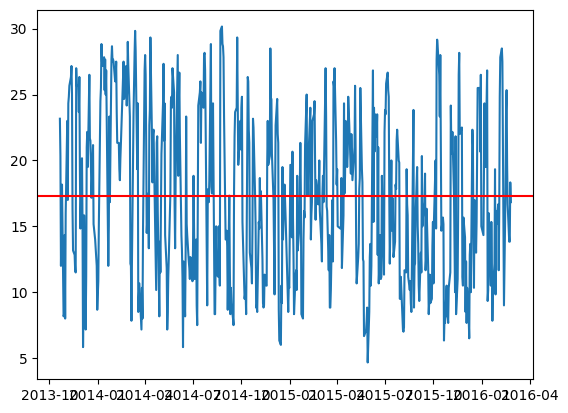

In [1033]:
# HACEMOS UNA ANALISIS COMO ES LA VARIACION DE POSICIONES DENTRO DEL RANKING PARA ALGUN ACTIVO
plt.plot(ranking_concat['ITX'][5000:5600])
plt.axhline(xmin=0,xmax=5,y=ranking_concat['ITX'][5000:5600].mean(),c='red');

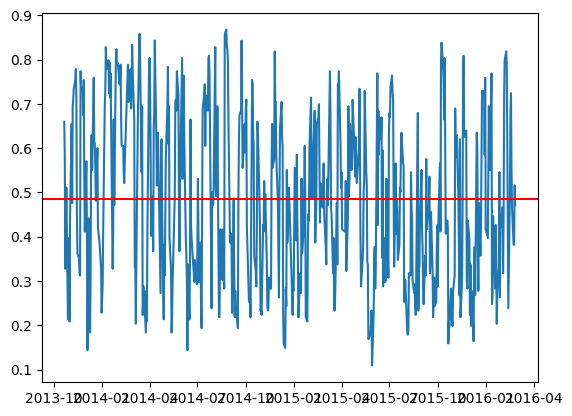

In [1032]:
plt.plot(ranking['ITX'][5000:5600])
plt.axhline(xmin=0,xmax=5,y=ranking['ITX'][5000:5600].mean(),c='red');

In [939]:
ranking = tf.keras.utils.to_categorical(ranking_concat,num_classes = len(ranking_concat.columns))

In [1319]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout, Reshape, Conv1D,Masking, LSTM
from keras.optimizers import Adam
from keras.regularizers import L2,L1L2,L1
from keras.models import Sequential
import tensorflow_ranking as tfr
from keras.callbacks import EarlyStopping

In [1035]:
window = 30

In [1036]:
# scaled_information_ratio = (information_ratio - information_ratio.min()) / (information_ratio.max() - information_ratio.min())
# scaled_information_ratio

In [1271]:
normalized_returns.min().min()

0.0

In [1275]:
normalized_returns = (returns_cleaned - returns_cleaned.min().min()) / (returns_cleaned.max().max()-returns_cleaned.min().min())
normalized_returns = normalized_returns.apply(lambda x: x.fillna(abs(returns_cleaned.min().min())*-2), axis=1)
normalized_returns

A3TV       ABE   ABG.P_1       ABG       ACS     ACX_1  \
date                                                                     
1993-08-17 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.537588   
1993-08-18 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.534740   
1993-08-19 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.532775   
1993-08-20 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.529879   
1993-08-23 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.533970   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146  0.539268 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146  0.535218 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146  0.544537 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146  0.540787 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146  0.537699 -1.097146   

               ACX_2      AENA       AGS     ALB_2  ...       TRE       TUB  \
date                                                ...                       
1993-08-17 -1.097146 -1.097146 -1.097146  0.559667  ... -1.097146 -1.097146   
1993-08-18 -1.097146 -1.097146 -1.097146  0.540507  ... -1.097146 -1.097146   
1993-08-19 -1.097146 -1.097146 -1.097146  0.527322  ... -1.097146 -1.097146   
1993-08-20 -1.097146 -1.097146 -1.097146  0.531020  ... -1.097146 -1.097146   
1993-08-23 -1.097146 -1.097146 -1.097146  0.509671  ... -1.097146 -1.097146   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-07  0.538663  0.532059 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-08  0.527933  0.540146 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-09  0.549173  0.544150 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-10  0.542189  0.544095 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-11  0.523815  0.521744 -1.097146 -1.097146  ... -1.097146 -1.097146   

                 UNF       VIS     VIS_1     VIS_2     VIS_3       ZEL  \
date                                                                     
1993-08-17 -1.097146  0.561417 -1.097146 -1.097146 -1.097146 -1.097146   
1993-08-18 -1.097146  0.563286 -1.097146 -1.097146 -1.097146 -1.097146   
1993-08-19 -1.097146  0.515650 -1.097146 -1.097146 -1.097146 -1.097146   
1993-08-20 -1.097146  0.531390 -1.097146 -1.097146 -1.097146 -1.097146   
1993-08-23 -1.097146  0.536775 -1.097146 -1.097146 -1.097146 -1.097146   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   

            benchmark  risk_free_rate  
date                                   
1993-08-17   0.553320        0.566874  
1993-08-18   0.548965        0.566560  
1993-08-19   0.544223        0.566463  
1993-08-20   0.536381        0.566551  
1993-08-23   0.533711        0.566707  
...               ...             ...  
2023-08-07   0.535751        0.589966  
2023-08-08   0.530818        0.589966  
2023-08-09   0.542293        0.589966  
2023-08-10   0.552114        0.589966  
2023-08-11   0.529758        0.589966  

[7600 rows x 99 columns]

In [1276]:
sharpe_input = (sharpe_ratio.dropna(how='all') - sharpe_ratio.min().min()) / (sharpe_ratio.max().max()-sharpe_ratio.min().min())
sharpe_input = sharpe_input.apply(lambda x: x.fillna(abs(returns_cleaned.min().min())*-2), axis=1)
sharpe_input

A3TV       ABE   ABG.P_1       ABG       ACS     ACX_1  \
date                                                                     
1993-08-23 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.975381   
1993-08-24 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.985734   
1993-08-25 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.985739   
1993-08-26 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.986304   
1993-08-27 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.986834   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146  0.979660 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146  0.979536 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146  0.980672 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146  0.973872 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146  0.972659 -1.097146   

               ACX_2      AENA       AGS     ALB_2  ...       TEM       TL5  \
date                                                ...                       
1993-08-23 -1.097146 -1.097146 -1.097146  0.987716  ... -1.097146 -1.097146   
1993-08-24 -1.097146 -1.097146 -1.097146  0.988197  ... -1.097146 -1.097146   
1993-08-25 -1.097146 -1.097146 -1.097146  0.988661  ... -1.097146 -1.097146   
1993-08-26 -1.097146 -1.097146 -1.097146  0.988788  ... -1.097146 -1.097146   
1993-08-27 -1.097146 -1.097146 -1.097146  0.988766  ... -1.097146 -1.097146   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-07  0.979842  0.981112 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-08  0.979564  0.979346 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-09  0.982081  0.980192 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-10  0.982020  0.980202 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-11  0.983728  0.983217 -1.097146 -1.097146  ... -1.097146 -1.097146   

                 TRE       TUB       UNF       VIS     VIS_1     VIS_2  \
date                                                                     
1993-08-23 -1.097146 -1.097146 -1.097146  0.988403 -1.097146 -1.097146   
1993-08-24 -1.097146 -1.097146 -1.097146  0.988542 -1.097146 -1.097146   
1993-08-25 -1.097146 -1.097146 -1.097146  0.987923 -1.097146 -1.097146   
1993-08-26 -1.097146 -1.097146 -1.097146  0.987734 -1.097146 -1.097146   
1993-08-27 -1.097146 -1.097146 -1.097146  0.987734 -1.097146 -1.097146   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   

               VIS_3       ZEL  
date                            
1993-08-23 -1.097146 -1.097146  
1993-08-24 -1.097146 -1.097146  
1993-08-25 -1.097146 -1.097146  
1993-08-26 -1.097146 -1.097146  
1993-08-27 -1.097146 -1.097146  
...              ...       ...  
2023-08-07 -1.097146 -1.097146  
2023-08-08 -1.097146 -1.097146  
2023-08-09 -1.097146 -1.097146  
2023-08-10 -1.097146 -1.097146  
2023-08-11 -1.097146 -1.097146  

[7596 rows x 97 columns]

In [1277]:
concat_input = pd.concat([sharpe_input, normalized_returns.iloc[LENGTH-1:,:-2]], axis=1).dropna(how='all')
concat_input

A3TV       ABE   ABG.P_1       ABG       ACS     ACX_1  \
date                                                                     
1993-08-23 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.975381   
1993-08-24 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.985734   
1993-08-25 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.985739   
1993-08-26 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.986304   
1993-08-27 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146  0.986834   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146  0.979660 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146  0.979536 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146  0.980672 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146  0.973872 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146  0.972659 -1.097146   

               ACX_2      AENA       AGS     ALB_2  ...       TEM       TL5  \
date                                                ...                       
1993-08-23 -1.097146 -1.097146 -1.097146  0.987716  ... -1.097146 -1.097146   
1993-08-24 -1.097146 -1.097146 -1.097146  0.988197  ... -1.097146 -1.097146   
1993-08-25 -1.097146 -1.097146 -1.097146  0.988661  ... -1.097146 -1.097146   
1993-08-26 -1.097146 -1.097146 -1.097146  0.988788  ... -1.097146 -1.097146   
1993-08-27 -1.097146 -1.097146 -1.097146  0.988766  ... -1.097146 -1.097146   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-07  0.979842  0.981112 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-08  0.979564  0.979346 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-09  0.982081  0.980192 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-10  0.982020  0.980202 -1.097146 -1.097146  ... -1.097146 -1.097146   
2023-08-11  0.983728  0.983217 -1.097146 -1.097146  ... -1.097146 -1.097146   

                 TRE       TUB       UNF       VIS     VIS_1     VIS_2  \
date                                                                     
1993-08-23 -1.097146 -1.097146 -1.097146  0.536775 -1.097146 -1.097146   
1993-08-24 -1.097146 -1.097146 -1.097146  0.566035 -1.097146 -1.097146   
1993-08-25 -1.097146 -1.097146 -1.097146  0.534026 -1.097146 -1.097146   
1993-08-26 -1.097146 -1.097146 -1.097146  0.528859 -1.097146 -1.097146   
1993-08-27 -1.097146 -1.097146 -1.097146  0.531652 -1.097146 -1.097146   
...              ...       ...       ...       ...       ...       ...   
2023-08-07 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-08 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-09 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-10 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   
2023-08-11 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146 -1.097146   

               VIS_3       ZEL  
date                            
1993-08-23 -1.097146 -1.097146  
1993-08-24 -1.097146 -1.097146  
1993-08-25 -1.097146 -1.097146  
1993-08-26 -1.097146 -1.097146  
1993-08-27 -1.097146 -1.097146  
...              ...       ...  
2023-08-07 -1.097146 -1.097146  
2023-08-08 -1.097146 -1.097146  
2023-08-09 -1.097146 -1.097146  
2023-08-10 -1.097146 -1.097146  
2023-08-11 -1.097146 -1.097146  

[7596 rows x 194 columns]

In [1278]:
test_2 = []
for i in range(concat_input.shape[0]-window):
    a = concat_input.iloc[i,:in_index_mask.shape[1]]
    b = concat_input.iloc[i,in_index_mask.shape[1]:]
    c = pd.concat([a,b], axis=1)
    c.columns = ['mask','returns']
    test_2.append(c)
test_2  = np.array(test_2)
test_2.shape

(7566, 97, 2)

In [1279]:
test_split = math.floor(test_2.shape[0]*0.7)
val_split = math.floor(test_2.shape[0]*0.9)
metricas = 2
data = np.zeros((test_2.shape[0], 90, test_2.shape[1], 2))

for i in range(test_2.shape[0]-89):
    data[i] = test_2[i:i+DIAS]

In [1245]:
# data = data[:-90]

In [1242]:
X = normalized_returns.iloc[:,:-2]#[::5]#.fillna(returns.min().min() * 2,)
test_split = math.floor(X.shape[0]*0.7)
val_split = math.floor(X.shape[0]*0.9)
data = np.zeros((X.shape[0],DIAS,X.shape[1]))

for i in (range(X.shape[0]-DIAS)):
    data[i] = X[i:i+DIAS]
data.shape

(7600, 90, 97)

In [1281]:
data = data[:-90]
data.shape

(7476, 90, 97, 2)

In [1124]:
# data_ranking = np.zeros((ranking.shape[0],window,ranking.shape[1]))
# for i in range(ranking.shape[0]-window):
#     data_ranking[i] = ranking[i:i+window]

In [1125]:
# ranking = tf.keras.utils.to_categorical(ranking-1, num_classes = len(ranking.columns))

In [1317]:
ranking_concat

A3TV  ABE  ABG.P_1  ABG        ACS     ACX_1      ACX_2  \
date                                                                  
1993-12-27   NaN  NaN      NaN  NaN        NaN  3.333333        NaN   
1993-12-28   NaN  NaN      NaN  NaN        NaN  3.333333        NaN   
1993-12-29   NaN  NaN      NaN  NaN        NaN  3.666667        NaN   
1993-12-30   NaN  NaN      NaN  NaN        NaN  3.333333        NaN   
1993-12-31   NaN  NaN      NaN  NaN        NaN  4.000000        NaN   
...          ...  ...      ...  ...        ...       ...        ...   
2023-08-07   NaN  NaN      NaN  NaN  23.500000       NaN  23.333333   
2023-08-08   NaN  NaN      NaN  NaN  21.833333       NaN  23.500000   
2023-08-09   NaN  NaN      NaN  NaN  20.333333       NaN  18.000000   
2023-08-10   NaN  NaN      NaN  NaN  25.333333       NaN  22.166667   
2023-08-11   NaN  NaN      NaN  NaN  24.333333       NaN  16.833333   

                 AENA  AGS     ALB_2  ...  TEM  TL5  TRE  TUB  UNF       VIS  \
date                                  ...                                      
1993-12-27        NaN  NaN  3.500000  ...  NaN  NaN  NaN  NaN  NaN  7.166667   
1993-12-28        NaN  NaN  2.833333  ...  NaN  NaN  NaN  NaN  NaN  7.333333   
1993-12-29        NaN  NaN  2.666667  ...  NaN  NaN  NaN  NaN  NaN  6.833333   
1993-12-30        NaN  NaN  2.500000  ...  NaN  NaN  NaN  NaN  NaN  6.666667   
1993-12-31        NaN  NaN  2.333333  ...  NaN  NaN  NaN  NaN  NaN  6.000000   
...               ...  ...       ...  ...  ...  ...  ...  ...  ...       ...   
2023-08-07  21.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-08  22.000000  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-09  20.166667  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-10  21.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   
2023-08-11  17.333333  NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN   

            VIS_1  VIS_2  VIS_3  ZEL  
date                                  
1993-12-27    NaN    NaN    NaN  NaN  
1993-12-28    NaN    NaN    NaN  NaN  
1993-12-29    NaN    NaN    NaN  NaN  
1993-12-30    NaN    NaN    NaN  NaN  
1993-12-31    NaN    NaN    NaN  NaN  
...           ...    ...    ...  ...  
2023-08-07    NaN    NaN    NaN  NaN  
2023-08-08    NaN    NaN    NaN  NaN  
2023-08-09    NaN    NaN    NaN  NaN  
2023-08-10    NaN    NaN    NaN  NaN  
2023-08-11    NaN    NaN    NaN  NaN  

[7510 rows x 97 columns]

In [960]:
ranking = ranking[::5]
ranking

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [1282]:
mode = 'multiple'
if mode == 'single':
    X_train = data[:test_split]
    X_test = data[test_split:val_split]
    X_val = data[val_split:]
    y_train = ranking[:test_split]
    y_test = ranking[test_split:val_split]
    y_val = ranking[val_split:]

    print(X_train.shape)
    print(X_test.shape)
    print(X_val.shape)
    print(y_train.shape)
    print(y_test.shape)
    print(y_val.shape)
else:
    X_train = data[:test_split]
    X_test = data[test_split:val_split]
    X_val = data[val_split:-1]
    y_train = ranking[window+LENGTH:test_split+window+LENGTH]
    y_test = ranking[test_split+window+LENGTH:val_split+window+LENGTH]
    y_val = ranking[val_split+window+LENGTH:]

    print(X_train.shape)
    print(X_test.shape)
    print(X_val.shape)
    print(y_train.shape)
    print(y_test.shape)
    print(y_val.shape)

(5296, 90, 97, 2)
(1513, 90, 97, 2)
(666, 90, 97, 2)
(5296, 97)
(1513, 97)
(666, 97)


In [1265]:
from keras import backend as K
hp_top = 10
hp_incremento_top = 2
N_ACT = X_train.shape[2]
def top_is_target(y_true, y_pred):
  num_samples = K.shape(y_true)[0]

  w = K.arange(N_ACT, dtype='float32')
  w = K.reverse(w, axes=0) + 0.0001

  w = tf.where(K.arange(N_ACT) < hp_top, w * hp_incremento_top, w)
  # Replicar w a lo largo del eje 0 (batch)
  #w = K.repeat_elements(K.expand_dims(w, 0), num_samples, axis=0)
  w = tf.tile(K.expand_dims(w, 0), [num_samples, 1])

  # Calcular la pérdida
  r = K.cast(y_true, 'float32')
  r_pred = K.cast(y_pred, 'float32')

  return K.mean(K.square(w * (r_pred - r)), axis=-1)

In [655]:
model = Sequential()

model.add(Dense(12, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2],X_train.shape[3],),kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(0.1,0.5)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(0.1,0.5)))
model.add(Dropout(0.5))
# model.add(Dense(3, activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(0.1,0.5)))
# model.add(Dropout(0.5))
# model.add(Dense(3,activation='tanh',kernel_regularizer=L2(0.5)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(data.shape[2], activation='tanh'))
# model.add(Dense(data.shape[2]*window,activation='tanh'))
# model.add(Reshape([window, data.shape[2]]))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss=top_is_target)

IndexError: tuple index out of range

In [1327]:
model = Sequential()
model.add(tf.keras.layers.Masking(mask_value=normalized_returns.min().min(),
                                   input_shape=(data.shape[1], data.shape[2], data.shape[3],)))
                                   
model.add(Conv1D(10, 3, activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1(0.5)))
model.add(Dropout(0.5))
# model.add(Dense(6, activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1(0.5)))
# model.add(Dropout(0.5))
# model.add(Dense(3,activation='tanh',kernel_regularizer=L1(0.5)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(data.shape[2], activation='tanh'))
# model.add(Dense(data.shape[2]*window,activation='tanh'))
# model.add(Reshape([window, data.shape[2]]))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_29 (Masking)        (None, 90, 97, 2)         0         
                                                                 
 conv1d_25 (Conv1D)          (None, 90, 95, 10)        70        
                                                                 
 dropout_101 (Dropout)       (None, 90, 95, 10)        0         
                                                                 
 flatten_44 (Flatten)        (None, 85500)             0         
                                                                 
 dense_119 (Dense)           (None, 97)                8293597   
                                                                 
Total params: 8293667 (31.64 MB)
Trainable params: 8293667 (31.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1320]:
model = Sequential()
model.add(tf.keras.layers.Masking(mask_value=normalized_returns.min().min(),
                                   input_shape=(X_train.shape[1], X_train.shape[2],)))
                                   
model.add(Dense(data.shape[2], activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1(0.5)))
model.add(Dropout(0.5))
model.add(Dense(50, activation='tanh',kernel_initializer='glorot_uniform', kernel_regularizer=L1(0.5)))
model.add(Dropout(0.5))
model.add(Dense(25,activation='tanh',kernel_regularizer=L1(0.5)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(data.shape[2], activation='tanh'))
# model.add(Dense(data.shape[2]*window,activation='tanh'))
# model.add(Reshape([window, data.shape[2]]))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_26 (Masking)        (None, 90, 97)            0         
                                                                 
 dense_114 (Dense)           (None, 90, 97)            9506      
                                                                 
 dropout_97 (Dropout)        (None, 90, 97)            0         
                                                                 
 dense_115 (Dense)           (None, 90, 50)            4900      
                                                                 
 dropout_98 (Dropout)        (None, 90, 50)            0         
                                                                 
 dense_116 (Dense)           (None, 90, 25)            1275      
                                                                 
 dropout_99 (Dropout)        (None, 90, 25)          

In [1328]:
earlystopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)

In [1329]:
batch_size = 32
h = model.fit(
      X_train, y_train,
      epochs=len(X_train) // batch_size + 1,
      batch_size = batch_size,
      validation_data = (X_test, y_test),
      callbacks = [earlystopping],
      shuffle=False,
      verbose=True
          )


Epoch 1/166
166/166 [==============================] - 25s 140ms/step - loss: 4.7428 - val_loss: 3.1781
Epoch 2/166
166/166 [==============================] - 20s 122ms/step - loss: 1.7220 - val_loss: 2.2118
Epoch 3/166
  8/166 [>.............................] - ETA: 18s - loss: 2.4326

KeyboardInterrupt: 

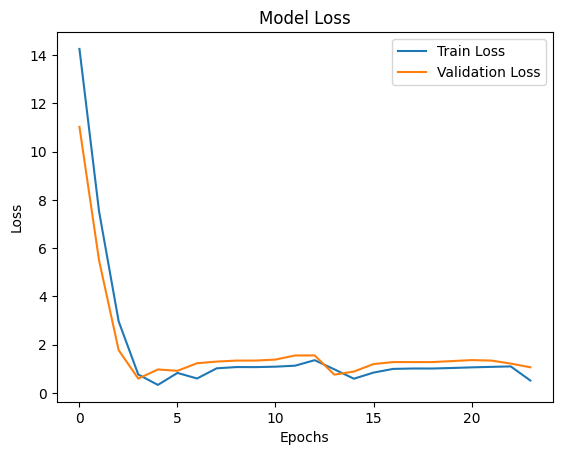

In [ ]:
plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
y_pred = model.predict(X_val)

21/21 [==============================] - 1s 18ms/step


In [ ]:
index = val_split
indexes = list(returns_cleaned.iloc[index:].iloc[:,:-2])

In [ ]:
ranking_concat.loc['2021-01-20'].sort_values()

MEL       5.833333
COL_1     7.666667
IAG       8.833333
PHM       9.833333
ANA_2    10.500000
           ...    
UNF            NaN
VIS            NaN
VIS_1          NaN
VIS_2          NaN
ZEL            NaN
Name: 2021-01-20 00:00:00, Length: 97, dtype: float64

In [ ]:
(y_val * (ranking_concat.max().max() - ranking_concat.min().min()) + ranking_concat.min().min()).iloc[0].sort_values(ascending=True)

A3TV    -32.600000
POP     -32.600000
OHLA    -32.600000
NHH_2   -32.600000
NHH     -32.600000
           ...    
GRF      25.500000
REE_1    25.666667
FER      27.666667
AMS_1    27.833333
COL_1    30.333333
Name: 2021-01-08 00:00:00, Length: 97, dtype: float64

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=returns.columns[:-2],index=y_val.index)
y_pred

A3TV       ABE   ABG.P_1       ABG      ACS     ACX_1  \
date                                                                    
2021-01-08 -0.894471  0.496033 -0.695030 -0.696873  0.50163 -0.285068   
2021-01-11 -0.894471  0.496033 -0.695030 -0.696873  0.50163 -0.285068   
2021-01-12 -0.894471  0.496033 -0.695030 -0.696873  0.50163 -0.285068   
2021-01-13 -0.894471  0.496033 -0.695030 -0.696873  0.50163 -0.285068   
2021-01-14 -0.894471  0.496033 -0.695030 -0.696873  0.50163 -0.285068   
...              ...       ...       ...       ...      ...       ...   
2023-08-07 -0.894471  0.496033 -0.695031 -0.696873  0.50163 -0.285067   
2023-08-08 -0.894471  0.496033 -0.695031 -0.696873  0.50163 -0.285067   
2023-08-09 -0.894471  0.496033 -0.695031 -0.696873  0.50163 -0.285067   
2023-08-10 -0.894471  0.496033 -0.695031 -0.696873  0.50163 -0.285067   
2023-08-11 -0.894471  0.496033 -0.695031 -0.696873  0.50163 -0.285067   

              ACX_2      AENA       AGS     ALB_2  ...       TEM       TL5  \
date                                               ...                       
2021-01-08 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438096   
2021-01-11 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438096   
2021-01-12 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438096   
2021-01-13 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438096   
2021-01-14 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438096   
...             ...       ...       ...       ...  ...       ...       ...   
2023-08-07 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438095   
2023-08-08 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438095   
2023-08-09 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438095   
2023-08-10 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438095   
2023-08-11 -0.94539 -0.947026 -0.882577 -0.835681  ... -0.985757  0.438095   

                 TRE       TUB       UNF       VIS    VIS_1     VIS_2   VIS_3  \
date                                                                            
2021-01-08  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2021-01-11  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2021-01-12  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2021-01-13  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2021-01-14  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
...              ...       ...       ...       ...      ...       ...     ...   
2023-08-07  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2023-08-08  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2023-08-09  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2023-08-10  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   
2023-08-11  0.605016 -0.830677 -0.988188 -0.798995 -0.85189  0.503115 -0.9474   

                 ZEL  
date                  
2021-01-08 -0.816342  
2021-01-11 -0.816342  
2021-01-12 -0.816342  
2021-01-13 -0.816342  
2021-01-14 -0.816342  
...              ...  
2023-08-07 -0.816342  
2023-08-08 -0.816342  
2023-08-09 -0.816342  
2023-08-10 -0.816342  
2023-08-11 -0.816342  

[666 rows x 97 columns]

In [ ]:
(y_pred * (ranking_concat.max().max() - ranking_concat.min().min()).T + ranking_concat.min().min()).iloc[0].sort_values(ascending=True)

CIN     -32.552002
IBLA    -32.461121
UNF     -32.203125
TEM     -32.121449
SGC     -31.971470
           ...    
AMS_1    30.259041
IAG      30.564030
MTS      32.270416
CABK     32.475220
DIA      33.201164
Name: 2021-01-08 00:00:00, Length: 97, dtype: float32

In [ ]:
error_total = pd.DataFrame()
in_index = []
for i in range(y_val.shape[0]-1):
    index = y_val.iloc[i].name
    indexes = list(returns.loc[index].dropna().index[:-2])
    ranking_real = np.argsort(np.argsort(-y_val.iloc[i][indexes]))
    ranking_pred = np.argsort(np.argsort(-y_pred.iloc[i][indexes]))

    ranking_real_ordenado = ranking_real.iloc[np.where(ranking_real<10)].index
    ranking_pred_ordenado = ranking_pred.iloc[np.where(ranking_pred<10)] .index   


    int_real_pred = len(set(ranking_real_ordenado).intersection(set(ranking_pred_ordenado)))

    error = ranking_real - ranking_pred
    # error_top = error[ranking_pred_ordenado.index]
    error_total = pd.concat([error_total,error], axis=1)
    in_index.append(int_real_pred)

In [ ]:
np.argsort(np.argsort(-y_pred[indexes]))

array([[12, 22, 28, ..., 25, 24, 14],
       [12, 22, 28, ..., 25, 24, 14],
       [12, 22, 28, ..., 25, 24, 14],
       ...,
       [12, 22, 28, ..., 25, 24, 14],
       [12, 22, 28, ..., 25, 24, 14],
       [12, 22, 28, ..., 25, 24, 14]], dtype=int64)

In [ ]:
np.argsort(np.argsort(-y_val[indexes]))

array([[15, 23,  4, ..., 31, 13, 27],
       [22, 20,  4, ..., 31,  9, 26],
       [22, 20, 11, ..., 31,  9, 26],
       ...,
       [ 8, 15, 10, ..., 16, 14, 12],
       [ 3,  5,  7, ..., 15, 31, 22],
       [ 4, 18, 17, ..., 13, 27, 21]], dtype=int64)

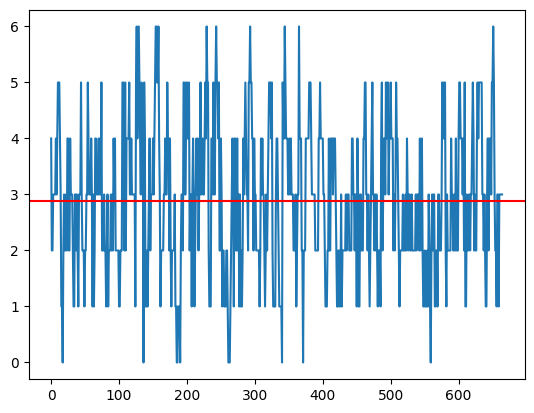

In [1308]:
plt.plot(range(y_val.shape[0]-1), in_index)
plt.axhline(xmin=0,xmax=y_val.shape[0], y=np.mean(in_index),c='red');

In [1309]:
error_total.columns = y_val[:-1].index

In [1311]:
(y_pred[indexes] * (ranking_concat[indexes].max().max() - ranking_concat[indexes].min().min())+ ranking_concat[indexes].min().min())

ACS      ACX_2       AENA      AMS_1      ANA_2        ANE  \
date                                                                           
2021-01-08  17.754438 -30.576021 -30.630671  30.084883 -30.580482 -30.714167   
2021-01-11  17.754438 -30.576021 -30.630671  30.084883 -30.580482 -30.714167   
2021-01-12  17.754438 -30.576021 -30.630671  30.084883 -30.580484 -30.714167   
2021-01-13  17.754438 -30.576023 -30.630671  30.084883 -30.580482 -30.714167   
2021-01-14  17.754436 -30.576023 -30.630671  30.084883 -30.580484 -30.714167   
...               ...        ...        ...        ...        ...        ...   
2023-08-07  17.754438 -30.576019 -30.630667  30.084881 -30.580481 -30.714169   
2023-08-08  17.754438 -30.576019 -30.630667  30.084881 -30.580481 -30.714169   
2023-08-09  17.754438 -30.576019 -30.630667  30.084881 -30.580479 -30.714169   
2023-08-10  17.754438 -30.576021 -30.630667  30.084881 -30.580479 -30.714169   
2023-08-11  17.754438 -30.576021 -30.630667  30.084881 -30.580481 -30.714169   

                 BBVA        BKT       CABK       CLNX  ...        MTS  \
date                                                    ...              
2021-01-08  15.712560  14.723310  32.287868 -30.619116  ...  32.084282   
2021-01-11  15.712560  14.723310  32.287868 -30.619116  ...  32.084282   
2021-01-12  15.712560  14.723310  32.287868 -30.619114  ...  32.084282   
2021-01-13  15.712560  14.723310  32.287868 -30.619114  ...  32.084282   
2021-01-14  15.712560  14.723310  32.287868 -30.619116  ...  32.084282   
...               ...        ...        ...        ...  ...        ...   
2023-08-07  15.712561  14.723307  32.287868 -30.619116  ...  32.084278   
2023-08-08  15.712561  14.723307  32.287868 -30.619112  ...  32.084278   
2023-08-09  15.712561  14.723307  32.287868 -30.619112  ...  32.084278   
2023-08-10  15.712561  14.723307  32.287868 -30.619110  ...  32.084278   
2023-08-11  15.712561  14.723307  32.287868 -30.619110  ...  32.084278   

                 NTGY        RED        REP       ROVI        SAB      SAN_1  \
date                                                                           
2021-01-08  18.173079 -30.404051  16.814651 -30.620838  19.144848  18.882528   
2021-01-11  18.173079 -30.404051  16.814651 -30.620834  19.144846  18.882528   
2021-01-12  18.173079 -30.404053  16.814651 -30.620834  19.144848  18.882528   
2021-01-13  18.173079 -30.404051  16.814651 -30.620838  19.144848  18.882528   
2021-01-14  18.173079 -30.404051  16.814650 -30.620838  19.144846  18.882528   
...               ...        ...        ...        ...        ...        ...   
2023-08-07  18.173080 -30.404049  16.814648 -30.620832  19.144844  18.882528   
2023-08-08  18.173079 -30.404049  16.814648 -30.620832  19.144844  18.882528   
2023-08-09  18.173080 -30.404049  16.814648 -30.620832  19.144844  18.882528   
2023-08-10  18.173079 -30.404047  16.814648 -30.620834  19.144844  18.882528   
2023-08-11  18.173080 -30.404047  16.814648 -30.620834  19.144844  18.882528   

               SCYR_2        SLR        TEF  
date                                         
2021-01-08 -30.616503 -30.582863  16.666805  
2021-01-11 -30.616503 -30.582863  16.666805  
2021-01-12 -30.616495 -30.582863  16.666805  
2021-01-13 -30.616503 -30.582863  16.666805  
2021-01-14 -30.616503 -30.582863  16.666805  
...               ...        ...        ...  
2023-08-07 -30.616495 -30.582861  16.666809  
2023-08-08 -30.616495 -30.582861  16.666809  
2023-08-09 -30.616495 -30.582861  16.666809  
2023-08-10 -30.616493 -30.582863  16.666809  
2023-08-11 -30.616493 -30.582863  16.666809  

[666 rows x 33 columns]

In [1312]:
error_total

date    2021-01-08  2021-01-11  2021-01-12  2021-01-13  2021-01-14  \
ACS            7.0        16.0        16.0         7.0        12.0   
ACX_2          2.0         0.0         0.0         4.0       -13.0   
AENA         -24.0       -24.0       -15.0       -26.0        -9.0   
ALM           -4.0        -8.0       -10.0        -4.0        -6.0   
AMS_1         -2.0         0.0         2.0         3.0        17.0   
ANA_2          2.0        -5.0        -5.0        -1.0       -13.0   
BBVA           5.0         4.0         2.0       -15.0       -12.0   
BKIA_1        11.0         9.0        13.0        11.0       -16.0   
BKT           11.0        17.0        10.0        11.0       -16.0   
CABK          33.0        27.0        29.0        21.0         7.0   
CIE          -18.0       -18.0         3.0       -12.0        -5.0   
CLNX         -21.0       -21.0       -23.0       -14.0       -12.0   
COL_1        -31.0       -30.0       -30.0       -24.0        -1.0   
ELE_1        -11.0       -17.0       -18.0        -8.0        -5.0   
ENG            0.0         4.0        11.0        23.0        20.0   
FER          -17.0       -17.0       -15.0       -18.0       -17.0   
GRF           -2.0         1.0         2.0        14.0        21.0   
IAG            5.0        12.0        17.0         8.0        23.0   
IBE            4.0         0.0        -9.0        -6.0       -13.0   
IDR            9.0        19.0        18.0        20.0        29.0   
ITX            7.0        -1.0         0.0        -8.0         4.0   
MAP_2         17.0        17.0        12.0        -2.0        -4.0   
MEL          -21.0       -16.0       -12.0       -17.0        -7.0   
MRL           -9.0       -15.0       -22.0        -6.0         7.0   
MTS           24.0        15.0        17.0         4.0         9.0   
NTGY          22.0        22.0        24.0        23.0        23.0   
PHM           -5.0        -2.0       -10.0         5.0         1.0   
REE_1        -13.0       -16.0       -16.0        -8.0        -5.0   
REP            0.0         2.0         1.0        -4.0         6.0   
SAB           16.0        24.0        23.0        16.0         1.0   
SAN_1         18.0        22.0        23.0        14.0         5.0   
SGRE          -2.0        -3.0       -16.0        -9.0       -20.0   
SLR          -12.0       -17.0       -15.0       -14.0       -19.0   
TEF           20.0        19.0        18.0        20.0        18.0   
VIS_3        -21.0       -20.0       -25.0        -8.0       -10.0   
FDR            NaN         NaN         NaN         NaN         NaN   
ROVI           NaN         NaN         NaN         NaN         NaN   
RED            NaN         NaN         NaN         NaN         NaN   
ANE            NaN         NaN         NaN         NaN         NaN   
SCYR_2         NaN         NaN         NaN         NaN         NaN   

date    2021-01-15  2021-01-18  2021-01-19  2021-01-20  2021-01-21  ...  \
ACS           21.0        14.0         3.0        14.0        -4.0  ...   
ACX_2        -14.0       -12.0        -9.0        -6.0         0.0  ...   
AENA          -7.0       -12.0       -16.0       -19.0       -23.0  ...   
ALM           -3.0        -7.0        -4.0       -10.0        -6.0  ...   
AMS_1          9.0        14.0         7.0        20.0        11.0  ...   
ANA_2        -13.0         2.0         4.0         3.0         5.0  ...   
BBVA         -15.0       -11.0       -12.0        -7.0         0.0  ...   
BKIA_1       -14.0       -13.0       -19.0       -20.0       -20.0  ...   
BKT          -16.0        -9.0        -8.0       -10.0        14.0  ...   
CABK           8.0         9.0         4.0         3.0         3.0  ...   
CIE           -3.0        -2.0        -6.0        -2.0         3.0  ...   
CLNX         -19.0       -28.0       -23.0        -7.0         4.0  ...   
COL_1         -4.0         0.0         2.0         2.0       -10.0  ...   
ELE_1          1.0        -7.0         7.0        -9.0        -8.0  ...   
ENG 

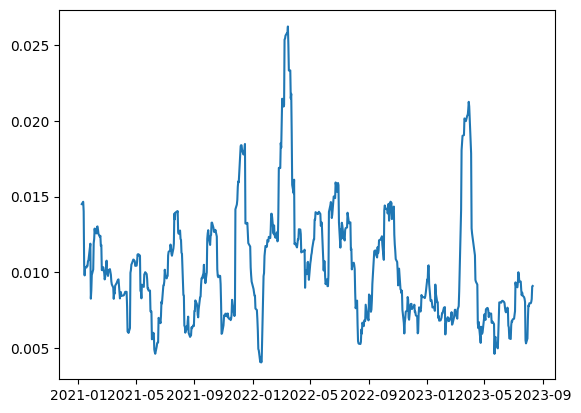

In [1313]:
plt.plot(returns['benchmark'].rolling(15,min_periods=15).std()[y_val.index]);

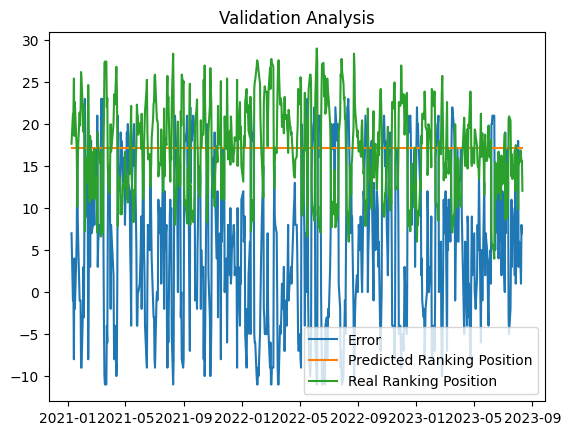

In [1314]:
act = 'ITX'
plt.plot(error_total.loc[act],label='Error')
plt.plot(y_val.index, (y_pred[act] * (ranking_concat[act].max().max() - ranking_concat[act].min().min()) + ranking_concat[act].min().min()), label='Predicted Ranking Position')
plt.plot(y_val.index, (y_val[act] * (ranking_concat[act].max().max() - ranking_concat[act].min().min()) + ranking_concat[act].min().min()), label='Real Ranking Position')
# plt.plot(returns[act].rolling(5,min_periods=1).std()[y_val.index]*1000, c='green');
plt.title('Validation Analysis')
plt.legend();

In [1315]:
error_total.mean(axis=1)[(error_total.mean(axis=1)<5) & (error_total.mean(axis=1)>-5)],error_total.std(axis=1)[(error_total.mean(axis=1)<5) & (error_total.mean(axis=1)>-5)]

(ACS       1.742857
 ACX_2    -4.745865
 BBVA      3.135338
 BKIA_1    0.946429
 BKT       2.308271
 CIE      -4.846361
 FER      -3.100752
 IBE      -4.812030
 MRL      -4.990977
 PHM      -4.498239
 REE_1     1.980874
 TEF      -0.087218
 dtype: float64,
 ACS        9.223385
 ACX_2      9.558480
 BBVA       9.836297
 BKIA_1    11.825119
 BKT        9.945621
 CIE        9.631065
 FER        8.924740
 IBE        9.460564
 MRL        9.565716
 PHM        9.302481
 REE_1     10.293084
 TEF       10.734680
 dtype: float64)

In [1221]:
error_total.columns = pd.to_datetime(error_total.columns)

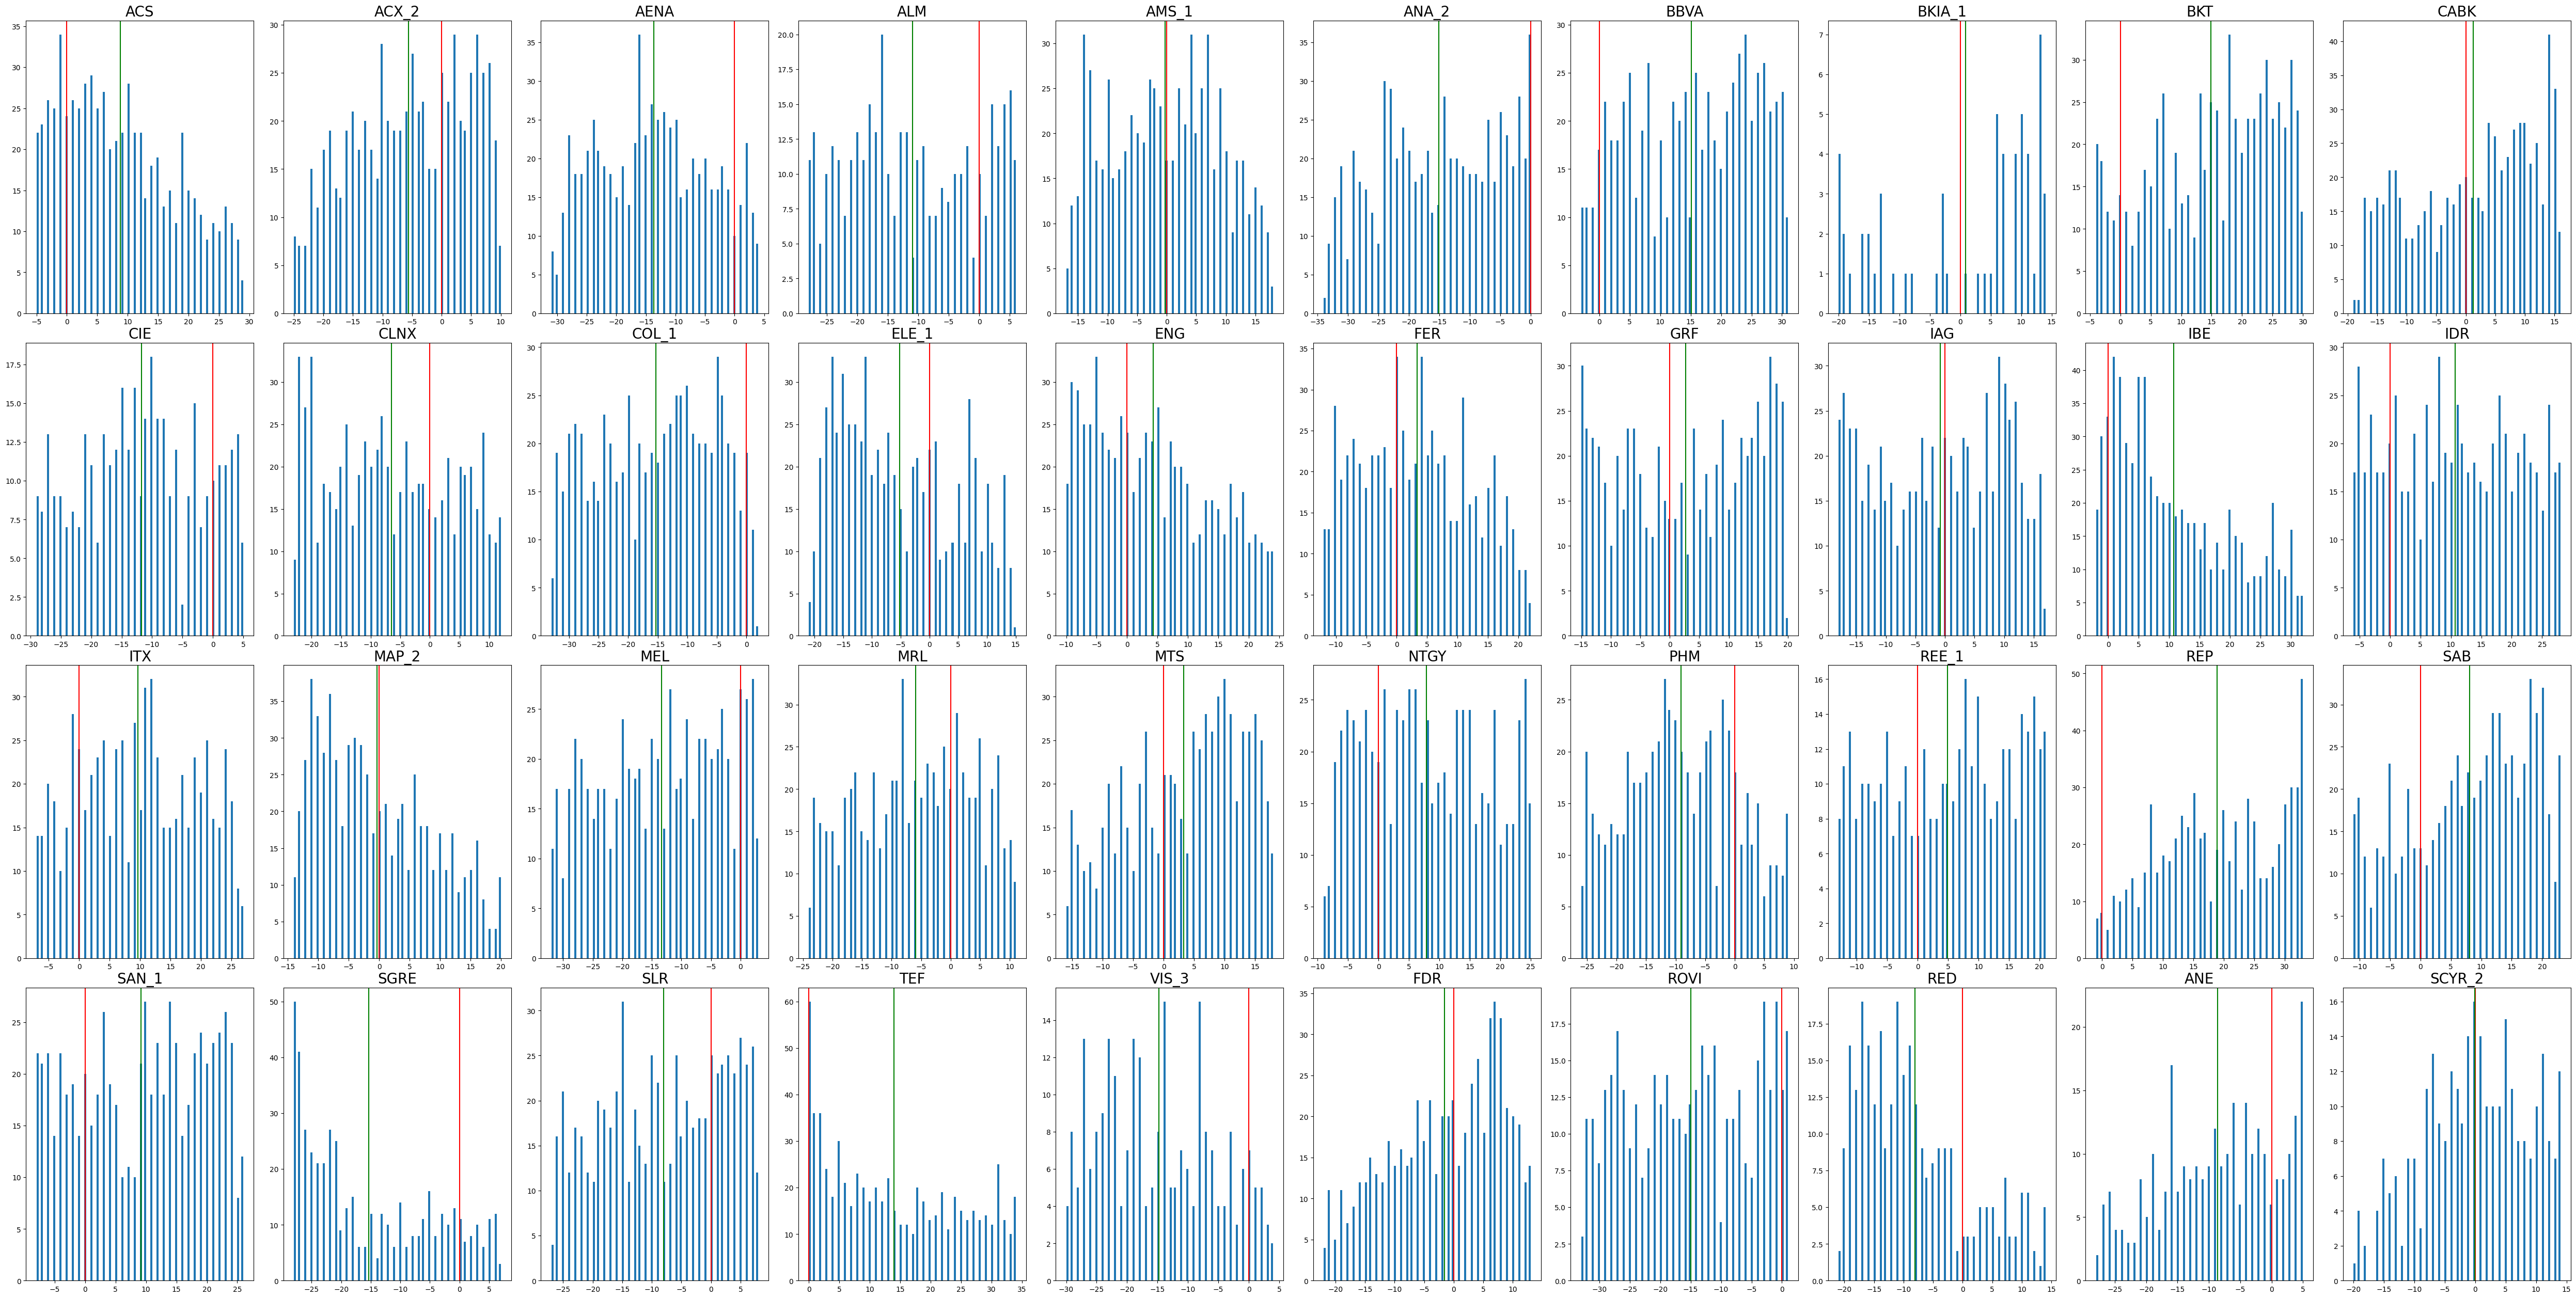

In [1222]:
# GRAFICAMOS LOS RETORNOS DE TODOS LOS ACTIVOS
fig, axs = plt.subplots(nrows=math.ceil(len(error_total.index)/10), ncols=10, figsize=(50, 25))
fig.tight_layout(h_pad=2)
axs = axs.ravel()

for i in range(len(error_total.index)):

    axs[i].hist(error_total.loc[error_total.index[i]].dropna(),bins=100)
    axs[i].axvline(x=0,ymin=0,ymax=error_total.loc[error_total.index[i]].dropna().max()+1,c='red')
    axs[i].axvline(x=error_total.loc[error_total.index[i]].dropna().mean(),ymin=0,ymax=error_total.loc[error_total.index[i]].dropna().max()+1,c='green')
    axs[i].set_title(error_total.index[i],fontsize=20)

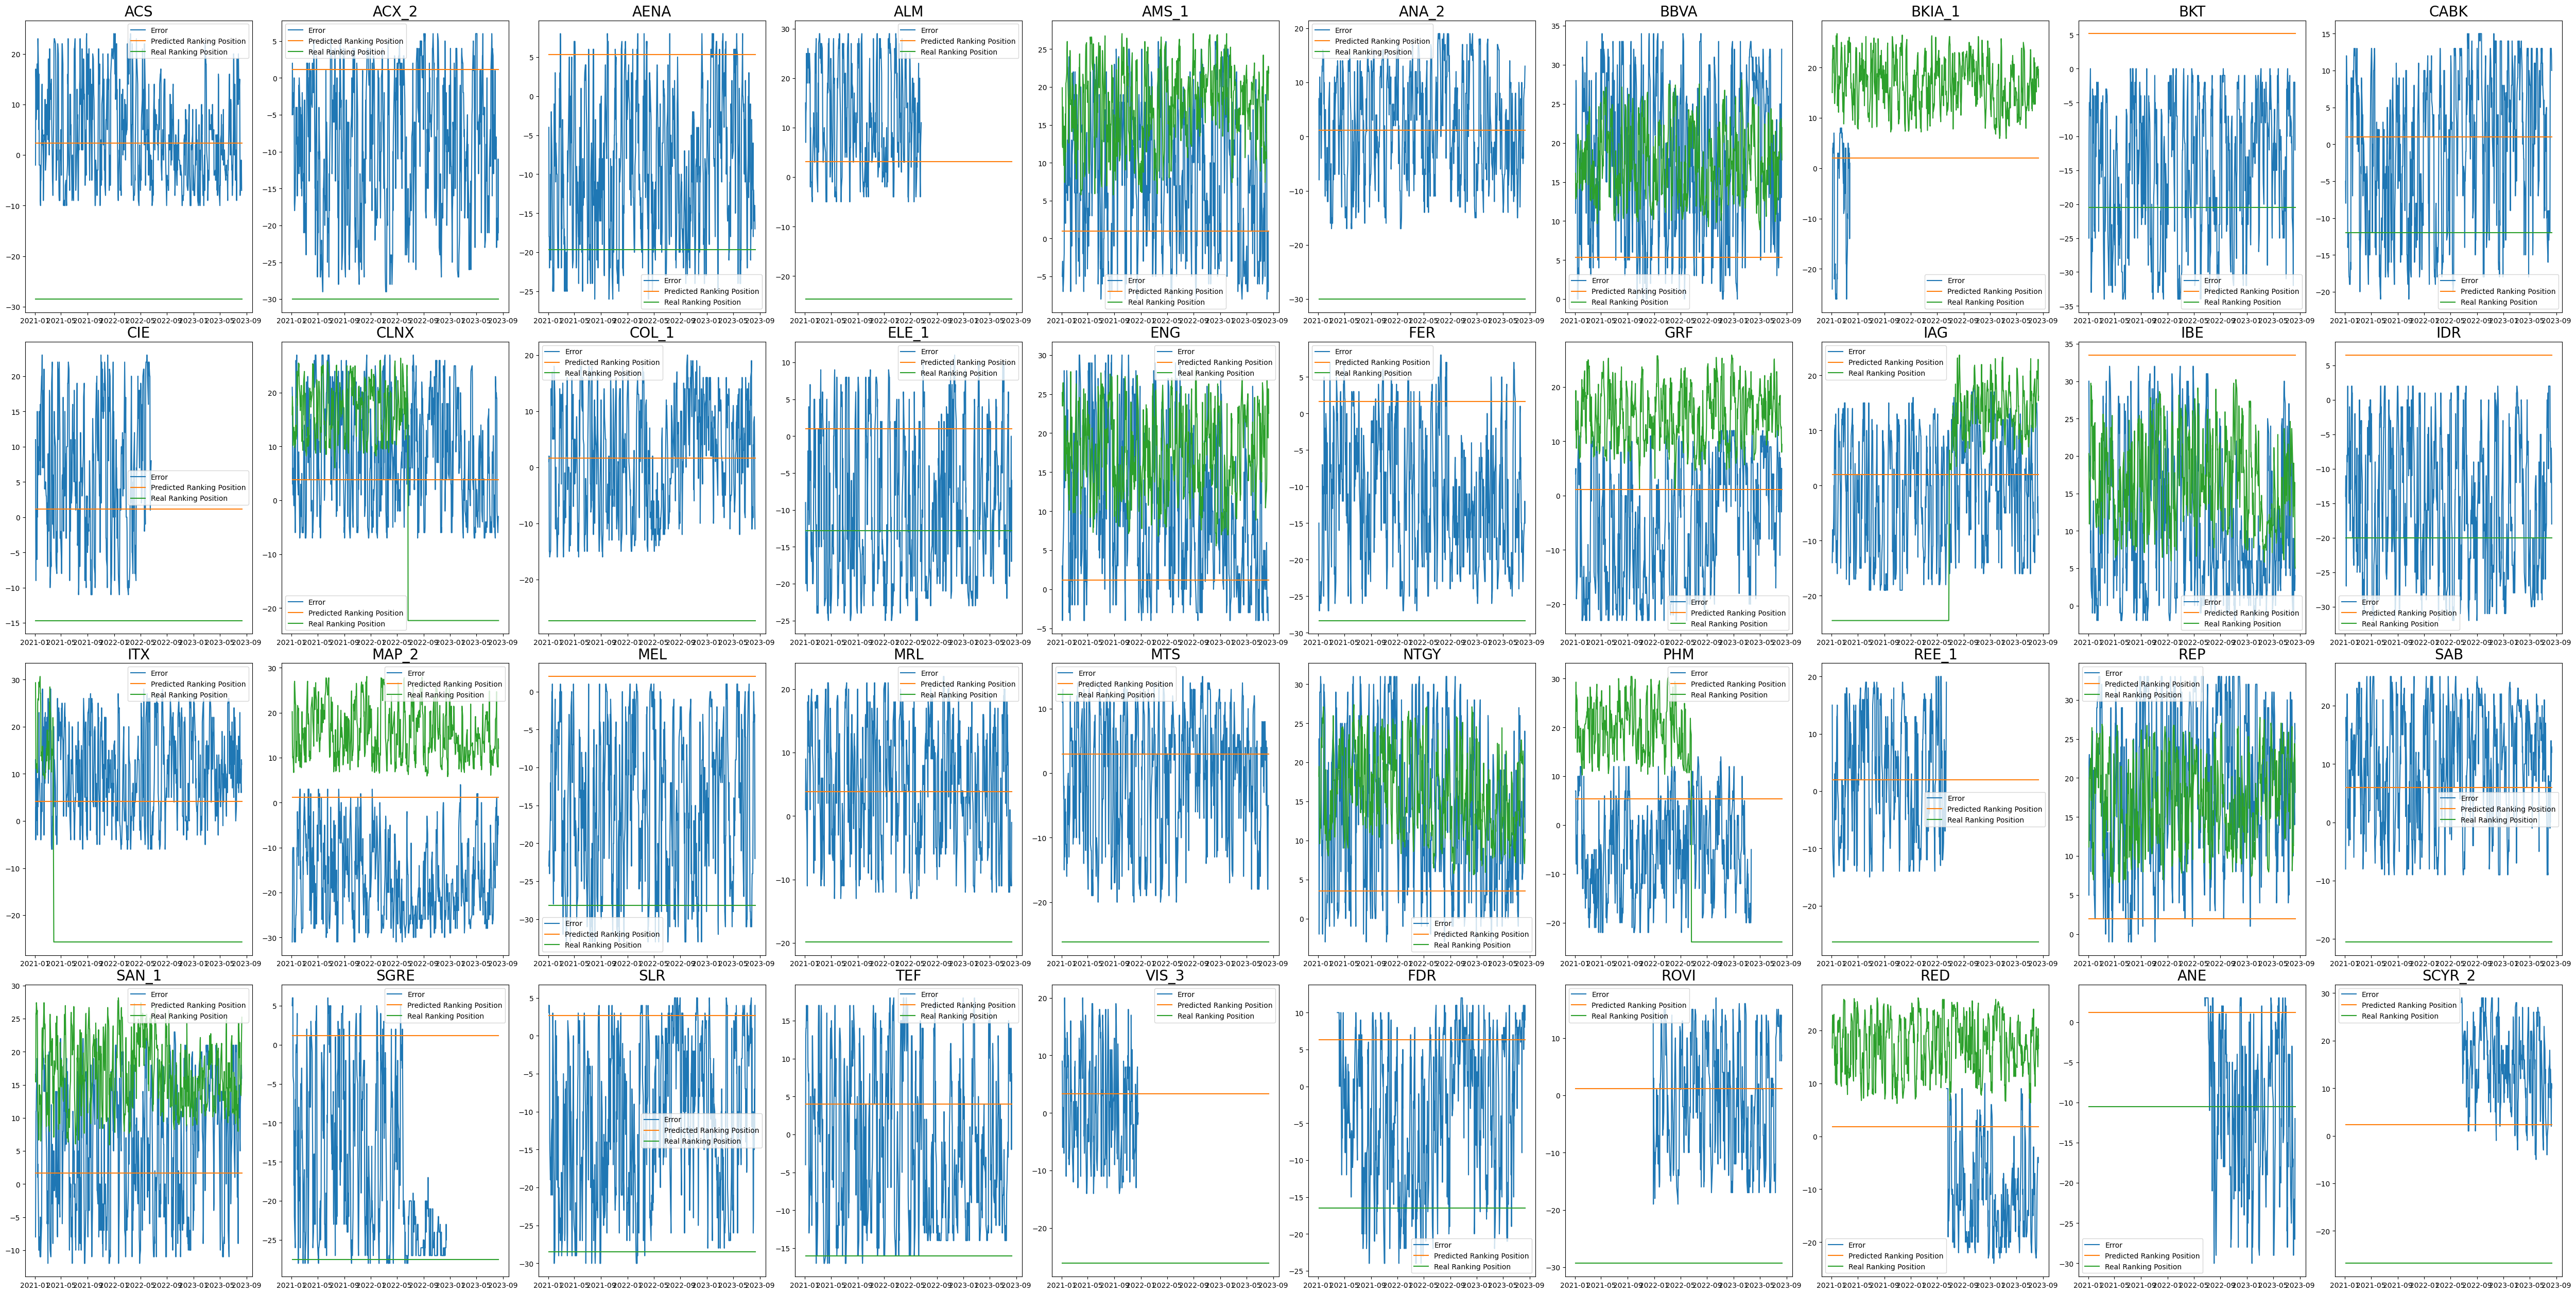

In [1100]:
# GRAFICAMOS LOS RETORNOS DE TODOS LOS ACTIVOS
fig, axs = plt.subplots(nrows=math.ceil(len(error_total.index)/10), ncols=10, figsize=(50, 25))
fig.tight_layout(h_pad=2)
axs = axs.ravel()

for act in range(len(error_total.index)):
    axs[act].plot(error_total.iloc[act],label='Error')
    axs[act].plot(y_val.index, ((y_pred.iloc[:,act]) * (ranking_concat.iloc[:,act].max().max() - ranking_concat.iloc[:,act].min().min()).T + ranking_concat.iloc[:,act].min().min()),label='Predicted Ranking Position')
    axs[act].plot(y_val.index, ((y_val.iloc[:,act]) * (ranking_concat.iloc[:,act].max().max() - ranking_concat.iloc[:,act].min().min()).T + ranking_concat.iloc[:,act].min().min()),label='Real Ranking Position')
    axs[act].set_title(error_total.index[act],fontsize=20)
    axs[act].legend();

In [ ]:
def get_loss(mask_value):
    mask_value = K.variable(mask_value)
    def masked_categorical_crossentropy(y_true, y_pred):
        # find out which timesteps in `y_true` are not the padding character '#'
        mask = K.all(K.equal(y_true, mask_value), axis=-1)
        mask = 1 - K.cast(mask, K.floatx())

        # multiply categorical_crossentropy with the mask
        loss = K.categorical_crossentropy(y_true, y_pred) * mask

        # take average w.r.t. the number of unmasked entries
        return K.sum(loss) / K.sum(mask)
    return masked_categorical_crossentropy

masked_categorical_crossentropy = get_loss(np.array([0, 0, 1]))
model = Model(input_tensor, output)
model.compile(loss=masked_categorical_crossentropy, optimizer='adam')